# Car price prediction

In [23]:
import pandas as pd
import numpy as np
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [24]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [25]:
cars = cars.replace('?', np.nan)
cars['normalized-losses'] = cars['normalized-losses'].astype('float')

In [26]:
cars.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [27]:
cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars[cols] = cars[cols].astype('float')


In [28]:
cars_numeric = cars[cols].copy()

# data cleaning

In [29]:
cars_numeric = cars_numeric.astype('float')

In [30]:
cars_numeric.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [31]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
cars_numeric = cars_numeric.dropna(subset=['price'])
cars_numeric.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [32]:
# Replace missing values in other columns using column means.
cars_numeric = cars_numeric.fillna(cars_numeric.mean())

In [33]:
# Confirm that there's no more missing values!
cars_numeric.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [34]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = cars_numeric['price']
cars_numeric = (cars_numeric-cars_numeric.min())/(cars_numeric.max()-cars_numeric.min())
cars_numeric['price']= price_col

# Univariate Model

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    #randomize rows in df
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round.
    df_len = int(len(rand_df)/2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:df_len].copy()
    test_df = rand_df.iloc[df_len:].copy()
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    # making a prediction
    predictions = knn.predict(test_df[[train_col]])
    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = mse**(1/2)
    return rmse

rmse_results = {}
train_cols = cars_numeric.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars_numeric)
    rmse_results[col] = rmse_val
    
# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()
    

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [36]:
def knn_train_test(train_col, target_col, df):
    k_values = [1,3,5,7,9]
    k_values_rmse = {}
    np.random.seed(1)

    #randomize rows in df
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    df_len = int(len(rand_df)/2)

    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:df_len].copy()
    test_df = rand_df.iloc[df_len:].copy()
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        # Fit a KNN model using default k value.
        knn.fit(train_df[[train_col]], train_df[target_col])
        # making a prediction
        predictions = knn.predict(test_df[[train_col]])
        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = mse**(1/2)
        k_values_rmse[k] = rmse
    return k_values_rmse

k_rmse_results = {}
train_cols = cars_numeric.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars_numeric)
    k_rmse_results[col] = rmse_val
k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885

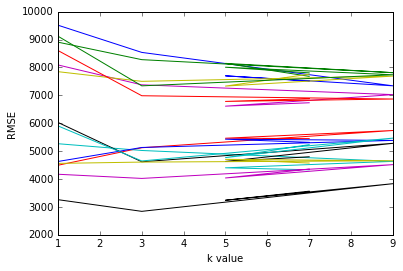

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

# multiple columns prediction

In [38]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)   
    

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


In [40]:
def knn_train_test(train_cols, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    #randomize rows in df
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round.
    df_len = int(len(rand_df)/2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:df_len].copy()
    test_df = rand_df.iloc[df_len:].copy()
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[train_cols], train_df[target_col])
    # making a prediction
    predictions = knn.predict(test_df[train_cols])
    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = mse**(1/2)
    return rmse

k_rmse_results = {}
train_cols = sorted_series_avg_rmse.index

for nr_of_features in range(2,6):
    rmse_val = knn_train_test(train_cols[:nr_of_features], 'price', cars_numeric)
    k_rmse_results[nr_of_features] = rmse_val
k_rmse_results

{2: 2949.8817277180374,
 3: 3580.7376651928435,
 4: 3487.340917327035,
 5: 3410.2170133901805}

# Hyperparameter Tuning

In [44]:
#For the top 3 models in the last step, we'll vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.

def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    #randomize rows in df
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round.
    df_len = int(len(rand_df)/2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:df_len].copy()
    test_df = rand_df.iloc[df_len:].copy()
    
    k_rmses = {}
    for k in range(1,25):
        knn = KNeighborsRegressor(n_neighbors=k)
        # Fit a KNN model using default k value.
        knn.fit(train_df[train_cols], train_df[target_col])
        # making a prediction
        predictions = knn.predict(test_df[train_cols])
        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = mse**(1/2)
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}
train_cols = sorted_series_avg_rmse.index

for nr_of_features in range(2,6):
    rmse_val = knn_train_test(train_cols[:nr_of_features], 'price', cars_numeric)
    k_rmse_results[nr_of_features] = rmse_val
k_rmse_results



{2: {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579},
 3: {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.216494947217,
  15: 4388.225713011904,
  16: 4408.838883583756

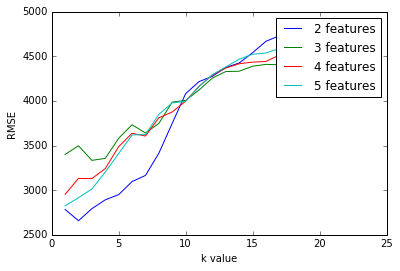

In [48]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{} features".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()